<a href="https://colab.research.google.com/github/Jason-Gitau/Neural-Networks/blob/main/CNN_image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# first we import the libraries we need
# What’s New Here?
#     Conv2D: Adds a convolutional layer to extract spatial features from the images.
#     MaxPooling2D: Reduces the spatial dimensions of the feature maps (downsampling).
#     Flatten: Converts the 2D feature maps into a 1D vector for the fully connected layers.

# NB// the new libraries are all under layers

# What’s Similar to version 1 and 2?
#     Dense: Fully connected layers are still used after the convolutional layers.
#     Sequential: The model is built layer by layer, just like before.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [ ]:
# now we want to load and preprocess data
# CNNs expect the input to include a channel dimension (e.g., grayscale images have 1 channel, RGB images have 3 channels).

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape data to include channel dimension (28x28x1 for grayscale images)
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# .reshape(-1, 28, 28, 1): Adds a channel dimension to the images. MNIST images are grayscale, so the channel size is 1. For RGB images, it would be 3.
# CNNs work directly with 2D images (instead of flattening them into vectors).

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# we want to build the CNN model
# Now comes the biggest difference: the architecture of the model. Instead of using only dense layers, we’ll add convolutional and pooling layers.

# Define the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),  # Convolutional layer
    MaxPooling2D(pool_size=(2, 2)),                                             # Pooling layer
    Conv2D(64, kernel_size=(3, 3), activation='relu'),                           # Second convolutional layer
    MaxPooling2D(pool_size=(2, 2)),                                             # Second pooling layer
    Flatten(),                                                                  # Flatten the feature maps
    Dense(128, activation='relu'),                                              # Fully connected layer
    Dense(10, activation='softmax')                                             # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Conv2D Layers : These extract spatial features like edges and textures from the images.
# 32 and 64: Number of filters (feature detectors) in each layer.
# kernel_size=(3, 3): Size of the filter (3x3 pixels).
# MaxPooling2D Layers : Reduce the spatial dimensions of the feature maps, making the model computationally efficient.
# pool_size=(2, 2): Reduces the size by half in both dimensions.
# Flatten Layer : Converts the 2D feature maps into a 1D vector for the fully connected layers.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# we want to train the model
# Train the model
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_test, y_test),
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)]
)

# What’s New Here?
# The CNN will likely achieve higher accuracy than your fully connected model because it preserves the spatial structure of the images.

# What’s Similar?
# Training involves specifying the number of epochs, batch size, and validation data.
# Early stopping is used to prevent overfitting, just like before.

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 29ms/step - accuracy: 0.9110 - loss: 0.2830 - val_accuracy: 0.9853 - val_loss: 0.0426
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9864 - loss: 0.0419 - val_accuracy: 0.9874 - val_loss: 0.0381
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9914 - loss: 0.0278 - val_accuracy: 0.9900 - val_loss: 0.0295
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9933 - loss: 0.0194 - val_accuracy: 0.9910 - val_loss: 0.0262
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9948 - loss: 0.0147 - val_accuracy: 0.9900 - val_loss: 0.0298
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9965 - loss: 0.0103 - val_accuracy: 0.9893 - val_loss: 0.0347
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9971 - loss: 0.0088 - val_accuracy: 0.9908 - val_loss: 0.0302


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


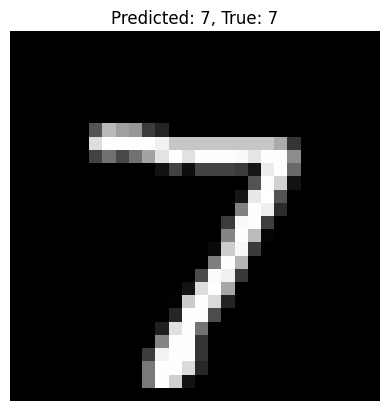

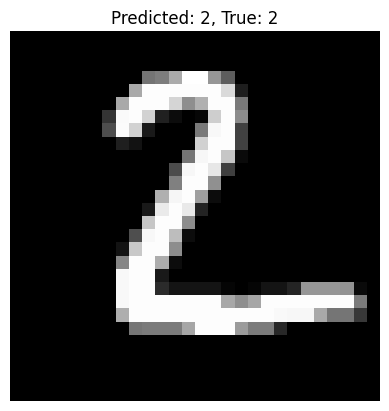

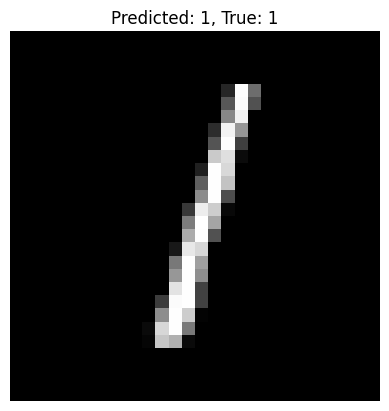

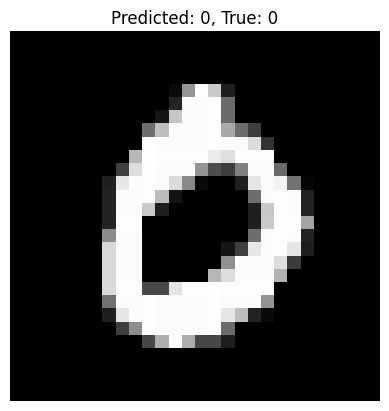

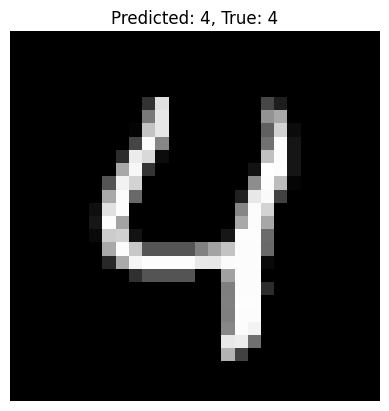

In [ ]:
# Visualize Predictions
# You can visualize predictions just like you did before, but now the model should make fewer mistakes.
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the test set
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Plot some examples
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_classes[i]}, True: {np.argmax(y_test[i])}")
    plt.axis('off')
    plt.show()

# What’s New Here?
# The CNN should predict the correct class more often, thanks to its ability to learn spatial features.
# What’s Similar?
# The visualization process is the same as before.

In [ ]:
# Evaluate the model on the MNIST test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Accuracy on MNIST Test Set: {test_accuracy * 100:.2f}%")

# What’s Happening Here?
# model.evaluate() computes the loss and accuracy of the model on the test set.
# test_accuracy is the percentage of correctly predicted labels.

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9877 - loss: 0.0331
Accuracy on MNIST Test Set: 99.10%


In [ ]:
# we want to pre process new data
from PIL import Image
import numpy as np
from tensorflow.keras.utils import to_categorical

# Function to preprocess a custom image
def preprocess_image(image_path):
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img = img.resize((28, 28))                # Resize to 28x28 pixels
    img = np.array(img)                      # Convert to NumPy array
    img = 255 - img                          # Invert colors if necessary (assuming dark digits on light background)
    img = (img > 128).astype('float32')      # Binarize the image (thresholding)
    # Change the reshape to include the channel dimension
    img = img.reshape(1, 28, 28, 1) / 255.0  # Reshape to (1, 28, 28, 1) and normalize
    return img

# List of paths to your custom images
custom_image_paths = ['/content/digi1.jpg', '/content/digi2.jpg', '/content/digi3.jpg','/content/digi4.jpg','/content/digi5.jpg','/content/digi6.jpg','/content/digi7.jpg','/content/digit 9.jpg','/content/digit8.jpg']

# True labels for your custom images
custom_labels = [1,2,3,4,5,6,7,9,8]  # Replace with your actual labels

# Preprocess all custom images
custom_images = np.vstack([preprocess_image(path) for path in custom_image_paths])

# Convert labels to one-hot encoding
custom_labels_one_hot = to_categorical(custom_labels, num_classes=10)

In [ ]:
# we want to evaluate the model on custom images
from sklearn.metrics import accuracy_score

# Make predictions on custom images
custom_predictions = model.predict(custom_images)
custom_predicted_classes = np.argmax(custom_predictions, axis=1)

# Calculate accuracy
accuracy = accuracy_score(custom_labels, custom_predicted_classes)
print(f"Accuracy on Custom Images: {accuracy * 100:.2f}%")

# Print predictions for each custom image
for i in range(len(custom_images)):
    print(f"Image {i}: Predicted = {custom_predicted_classes[i]}, True = {custom_labels[i]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Accuracy on Custom Images: 11.11%
Image 0: Predicted = 1, True = 1
Image 1: Predicted = 1, True = 2
Image 2: Predicted = 1, True = 3
Image 3: Predicted = 1, True = 4
Image 4: Predicted = 1, True = 5
Image 5: Predicted = 1, True = 6
Image 6: Predicted = 1, True = 7
Image 7: Predicted = 1, True = 9
Image 8: Predicted = 1, True = 8


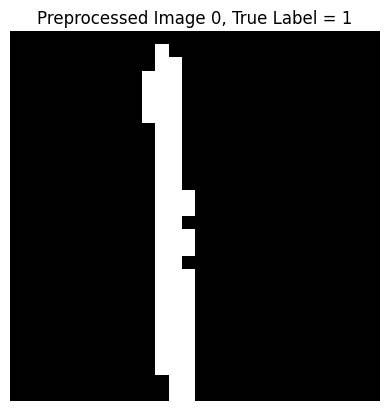

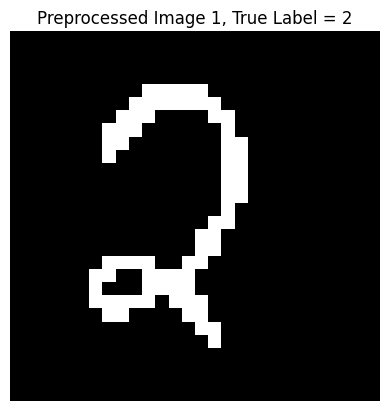

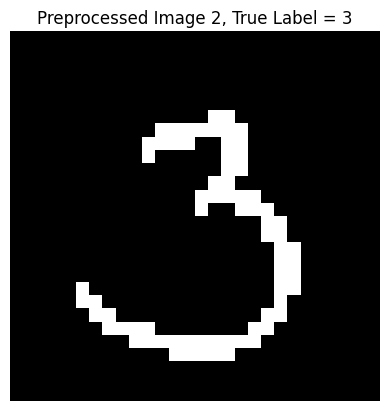

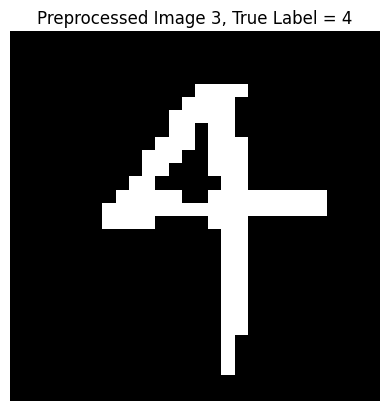

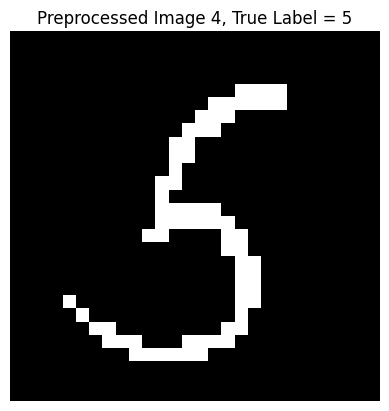

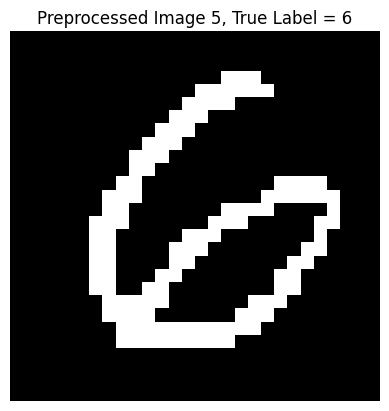

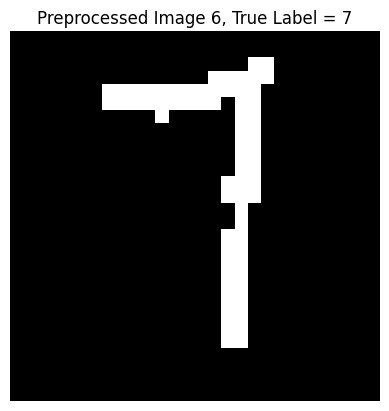

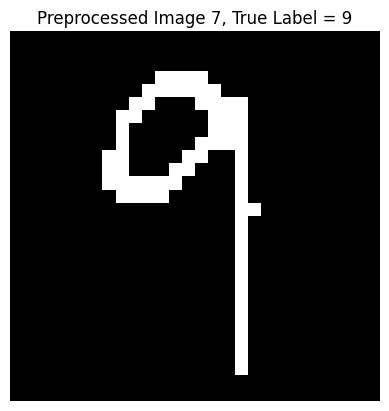

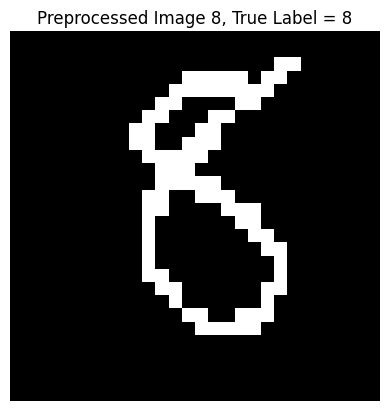

In [ ]:
# 1. Visualize Preprocessed Custom Images
# Visualize the preprocessed versions of your custom images to ensure they match the MNIST format.
import matplotlib.pyplot as plt

# Visualize preprocessed custom images
for i in range(len(custom_images)):
    plt.imshow(custom_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Preprocessed Image {i}, True Label = {custom_labels[i]}")
    plt.axis('off')
    plt.show()

# What to Look For :
# Are the digits centered within the 28x28 grid?
# Are the digits properly binarized (black and white)?
# Is there any noise or artifacts in the background?
# If the preprocessed images don’t look like the MNIST images, adjust your preprocessing pipeline.

In [ ]:
#Check Class Distribution in Training Data
# Ensure that the training data is balanced across all classes.


import numpy as np

# Check class distribution in MNIST training labels
unique, counts = np.unique(np.argmax(y_train, axis=1), return_counts=True)
print(dict(zip(unique, counts)))

# What to Look For :
# If one class (e.g., 1) is significantly more frequent than others, the model might be biased toward that class.
# If there’s an imbalance, consider using techniques like:

# Class weighting : Adjust the loss function to penalize misclassifications of minority classes more heavily.
# Oversampling : Increase the representation of minority classes in the training data.

{np.int64(0): np.int64(5923), np.int64(1): np.int64(6742), np.int64(2): np.int64(5958), np.int64(3): np.int64(6131), np.int64(4): np.int64(5842), np.int64(5): np.int64(5421), np.int64(6): np.int64(5918), np.int64(7): np.int64(6265), np.int64(8): np.int64(5851), np.int64(9): np.int64(5949)}


In [ ]:
# Evaluate Model on MNIST Test Set
# Check how well the model performs on the MNIST test set to determine if the issue is specific to your custom images or a broader problem.

# Evaluate on MNIST test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Accuracy on MNIST Test Set: {test_accuracy * 100:.2f}%")

# What to Expect :
# If the model performs well on the MNIST test set but poorly on your custom images, the issue is likely with the preprocessing or generalization to your custom data.
# If the model performs poorly on both datasets, the issue might be with the model itself (e.g., underfitting or overfitting).

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9877 - loss: 0.0331
Accuracy on MNIST Test Set: 99.10%


In [ ]:
# Fine-Tune the Model with Custom Data
# Since your custom images differ from the MNIST dataset, fine-tuning the model with your custom data can help improve performance.

from tensorflow.keras.utils import to_categorical

# Combine MNIST training data with custom data
x_combined = np.vstack([x_train, custom_images])
y_combined = np.vstack([y_train, custom_labels_one_hot])

# Shuffle the combined dataset
from sklearn.utils import shuffle
x_combined, y_combined = shuffle(x_combined, y_combined, random_state=42)

# Retrain the model
model.fit(
    x_combined, y_combined,
    epochs=10,
    batch_size=32,
    validation_data=(x_test, y_test)
)

# Why This Helps :
# Fine-tuning allows the model to learn patterns specific to your custom data while retaining knowledge from the MNIST dataset.

In [ ]:
#  Experiment with Data Augmentation
# If your custom images are limited in number, data augmentation can help the model generalize better.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,       # Randomly rotate images
    width_shift_range=0.1,   # Randomly shift images horizontally
    height_shift_range=0.1,  # Randomly shift images vertically
    zoom_range=0.1           # Randomly zoom in on images
)

# Fit the data generator on your custom images
datagen.fit(custom_images)

# Train the model with augmented data
model.fit(
    datagen.flow(custom_images, custom_labels_one_hot, batch_size=32),
    epochs=10,
    validation_data=(x_test, y_test)
)

# Why This Helps :
# Data augmentation increases the diversity of your custom dataset, making the model more robust to variations in handwriting.

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.1111 - loss: 2.3095 - val_accuracy: 0.9910 - val_loss: 0.0260
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.1111 - loss: 2.3077 - val_accuracy: 0.9914 - val_loss: 0.0260
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.1111 - loss: 2.3049 - val_accuracy: 0.9917 - val_loss: 0.0259
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.1111 - loss: 2.3016 - val_accuracy: 0.9916 - val_loss: 0.0259
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.1111 - loss: 2.2980 - val_accuracy: 0.9916 - val_loss: 0.0260
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.1111 - loss: 2.2944 - val_accuracy: 0.9915 - val_loss: 0.0260
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.1111 - loss: 2.2910 - val_accuracy: 0.9914 - val_loss: 0.0261
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.1111 - loss: 2.2878 - val_accuracy: 0.9913 - val_loss: 0.0263
Epoch 9/10
1/1 ━━━━━━━━━━━━

In [ ]:
# we want to evaluate the model on custom images
from sklearn.metrics import accuracy_score

# Make predictions on custom images
custom_predictions = model.predict(custom_images)
custom_predicted_classes = np.argmax(custom_predictions, axis=1)

# Calculate accuracy
accuracy = accuracy_score(custom_labels, custom_predicted_classes)
print(f"Accuracy on Custom Images: {accuracy * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Accuracy on Custom Images: 11.11%


In [ ]:
# Combine MNIST training data with custom data
x_combined = np.vstack([x_train, custom_images])
y_combined = np.vstack([y_train, custom_labels_one_hot])

    # Shuffle the combined dataset
from sklearn.utils import shuffle
x_combined, y_combined = shuffle(x_combined, y_combined, random_state=42)

  # Retrain the model
model.fit(
        x_combined, y_combined,
        epochs=10,
        batch_size=32,
        validation_data=(x_test, y_test)

    )


Epoch 1/10
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9940 - loss: 0.0176 - val_accuracy: 0.9906 - val_loss: 0.0294
Epoch 2/10
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9966 - loss: 0.0102 - val_accuracy: 0.9886 - val_loss: 0.0376
Epoch 3/10
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 84s 31ms/step - accuracy: 0.9974 - loss: 0.0080 - val_accuracy: 0.9910 - val_loss: 0.0316
Epoch 4/10
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 79s 29ms/step - accuracy: 0.9976 - loss: 0.0070 - val_accuracy: 0.9905 - val_loss: 0.0320
Epoch 5/10
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 55s 30ms/step - accuracy: 0.9983 - loss: 0.0051 - val_accuracy: 0.9912 - val_loss: 0.0405
Epoch 6/10
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9980 - loss: 0.0062 - val_accuracy: 0.9913 - val_loss: 0.0358
Epoch 7/10
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.9979 - loss: 0.0058 - val_accuracy: 0.9908 - val_loss: 0.0382
Epoch 8/10
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9986 -